<a href="https://colab.research.google.com/github/JavaFXpert/qiskit4devs-workshop-notebooks/blob/master/grover_search_party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Grover search for boolean satisfiability
### *Throwing a party while avoiding the drama*

Imagine you are inviting some friends to a party, some who are couples, and some who are not on speaking terms. Specifically, **Alice** and **Bob** are in a relationship, as are **Carol** and **David**. However, **Alice** and **David** had a bad breakup a while ago and haven't been civil with each other since. Armed with a quantum computer and Qiskit Aqua, how can you leverage Grover search algorithm to identify friendly combinations of people to invite?

Fortunately, Grover search may be used for [boolean satisfiability problems](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem), and the constraints for our party planning problem may be formulated with the following boolean expression:

`((A and B) or (C and D)) and not (A and D)`

In [5]:
# Do the necessary import for our program
#!pip install qiskit-aqua
from qiskit import BasicAer
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle
from qiskit.tools.visualization import plot_histogram
from qiskit.compiler import transpile

Let's go ahead and use our expression in a Grover search to find out compatible combinations of people to invite.
> Note: We'll represent `and` with `&`, `or` with `|`, `not` with `~` in our expression. 

In [48]:
oracle_type = "Bit" #<-"Log" or "Bit"


#log_expr = '((A & B) | (C & D)) & ~(A & D) & (F | G)'
#log_expr = '(A & B & C)' #<- Oracle for |111>
#bitstr = '00000001'

#log_expr = '(~A & ~B & ~C)' #<- Oracle for |000>
#bitstr = '10000000'

#log_expr = '((~A & ~B & ~C) & (A & B & C))' #<- Oracle for |000> + |111>
#bitstr = '10000001'

log_expr = '(~A & B & C)' #<- Oracle for |110>
bitstr = '00000010'


if oracle_type=="Log":
    algorithm = Grover(LogicalExpressionOracle(log_expr))
    circuit = Grover(LogicalExpressionOracle(log_expr)).construct_circuit()
else:
    algorithm = Grover(TruthTableOracle(bitstr))
    circuit = Grover(TruthTableOracle(bitstr)).construct_circuit()

print(circuit)


          ┌──────────┐ ┌─────────────┐                                        »
v_0: |0>──┤ U2(0,pi) ├─┤ U3(pi,0,pi) ├────────────────────■───────────────────»
          ├──────────┤ └─────────────┘                    │                   »
v_1: |0>──┤ U2(0,pi) ├──────────────────■─────────────────┼────────────────■──»
          ├──────────┤                  │                 │                │  »
v_2: |0>──┤ U2(0,pi) ├──────────────────┼─────────────────┼────────────────┼──»
        ┌─┴──────────┴┐  ┌──────────┐   │                 │                │  »
o_0: |0>┤ U3(pi,0,pi) ├──┤ U2(0,pi) ├───┼─────────────────┼────────────────┼──»
        └─┬──────────┬┘  ├──────────┤ ┌─┴─┐┌───────────┐┌─┴─┐┌──────────┐┌─┴─┐»
a_0: |0>──┤ U2(0,pi) ├───┤ U1(pi/4) ├─┤ X ├┤ U1(-pi/4) ├┤ X ├┤ U1(pi/4) ├┤ X ├»
          └──────────┘   └──────────┘ └───┘└───────────┘└───┘└──────────┘└───┘»
«                                                                             »
«v_0: ──────────────────────────────────

Now we'll run the algorithm on a simulator, printing the result that occurred most often. This result is expressed as the numeric representations of our four friends; a minus sign indicating which ones Grover advised against inviting in that particular result.

In [49]:
# Run the algorithm on a simulator, printing the most frequently occurring result
backend = BasicAer.get_backend('qasm_simulator')

result = algorithm.run(backend)
print(result['top_measurement'])
print(result['measurement'])

110
{'001': 26, '110': 806, '111': 24, '101': 38, '100': 27, '000': 32, '010': 33, '011': 38}


Finally, we'll plot the results. Each basis state represents our four friends, with the least significant bit representing Alice. If a bit is 1, then the advice is to invite the person that the bit represents. If the bit is 0, then Grover advises not to send an invitation.

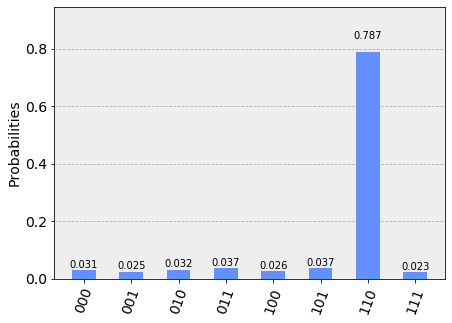

In [50]:
plot_histogram(result['measurement'])

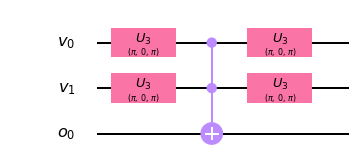

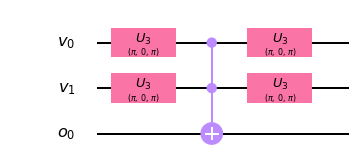

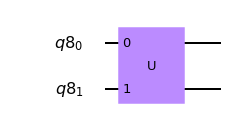

In [38]:
"""Test"""
bitstr_test = '1000'
oracle_test = TruthTableOracle(bitstr_test)
display(oracle_test.circuit.draw(output='mpl'))


expression_test2 = ('(~A & ~B)')
oracle_test2 = LogicalExpressionOracle(expression_test2)
display(oracle_test2.circuit.draw(output='mpl'))

from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, IBMQ
from qiskit.compiler import transpile
%matplotlib inline

IBMQ.load_account()
provider = IBMQ.load_account()

unitary_oracle_0 = Operator([
    [1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, -1]])

qr=QuantumRegister(2)
oracle_test3=QuantumCircuit(qr)
oracle_test3.append(unitary_oracle_0,qr)
display(oracle_test3.draw(output='mpl'))


device = provider.get_backend('ibmqx2')
trans_test = transpile(oracle_test3, device)
trans_test.draw()


In [ ]:
trans_bell2 = transpile(bell2, device)
trans_bell2.draw()

In [ ]:
help(Grover)


#### Now it's you're turn to play!

Create and implement your own scenario that can be modeled as a boolean satisfiability problem using Grover search. Have fun with it, and carry on with your quantum computing journey!